**Importing Libraries**

In [1]:
import os
import numpy as np
import pandas as pd


# Importing necessary libriaries
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

**Importing Datasets**

In [2]:
train = pd.read_csv('/kaggle/input/duth-ir-2023-2024/train.csv')#, encoding= 'unicode_escape')
train = train.rename(columns={'H DEFENSIVE RREBOUNDS':'H DEFENSIVE REBOUNDS'})
train = train.rename(columns={'H TOTAL 3POINTS':'H TOTAL 3 POINTS'})
train = train.rename(columns={'H OVERITME 2':'H OVERTIME 2'})
train = train.rename(columns={'A MADE 3 POIMTS':'A MADE 3 POINTS'})
train = train.rename(columns={'A STEASL':'A STEALS'})
test = pd.read_csv('/kaggle/input/duth-ir-2023-2024/test.csv')#, encoding= 'unicode_escape')
test = test.rename(columns={'H DEFENSIVE RREBOUNDS':'H DEFENSIVE REBOUNDS'})
test = test.rename(columns={'H TOTAL 3POINTS':'H TOTAL 3 POINTS'})
test = test.rename(columns={'A MADE 3 POIMTS':'A MADE 3 POINTS'})
test = test.rename(columns={'A STEASL':'A STEALS'})
test = test.rename(columns={'H OVERITME 2':'H OVERTIME 2'})

In [3]:
train.head()

,Unnamed: 0,HTEAM,HOME TEAM,HOME WIN,HOME POINTS,H MADE 2 POINTS,H TOTAL 2 POINTS,H MADE 3 POINTS,H TOTAL 3 POINTS,H MADE 1 POINTS,...,A BLOCKS AGAINST,A FOULS COMMITED,A FOULS RECEIVED,A PIR,A Q1,A Q2,A Q3,A Q4,A OVERTIME 1,A OVERTIME 2
0,0,LUG,LUGANO SNAKES,1,75,25,47,6,16,7,...,0,20,24,82,18,19,15,22,0.0,0.0
1,1,PAF,PAF BOLOGNA,1,91,22,44,5,15,32,...,2,33,24,81,22,27,16,20,0.0,0.0
2,2,CBE,ADECCO ESTUDIANTES,1,86,20,36,8,22,22,...,1,22,22,95,23,29,14,25,0.0,0.0
3,3,CHA,CHARLEROI,1,80,27,41,6,25,8,...,1,21,0,34,19,20,15,14,0.0,0.0
4,4,AEK,AEK,1,78,21,35,6,16,18,...,1,30,25,61,15,21,19,22,0.0,0.0


In [4]:
test.head()

,Unnamed: 0,HTEAM,HOME TEAM,HOME WIN,HOME POINTS,H MADE 2 POINTS,H TOTAL 2 POINTS,H MADE 3 POINTS,H TOTAL 3 POINTS,H MADE 1 POINTS,...,A BLOCKS AGAINST,A FOULS COMMITED,A FOULS RECEIVED,A PIR,A Q1,A Q2,A Q3,A Q4,A OVERTIME 1,A OVERTIME 2
0,3667,MIL,ARMANI MILANO,1,70,20,39,6,20,12,...,5,22,28,92,36,20,22,-78,0.0,0.0
1,3668,BAS,BASKONIA,1,101,29,48,11,30,10,...,2,19,17,94,40,24,24,-88,0.0,0.0
2,3669,OLY,OLYMPIAKOS,1,71,17,39,10,26,7,...,3,17,17,61,21,19,22,-62,0.0,0.0
3,3670,BAR,BARCELONA,1,81,19,30,10,23,13,...,0,20,16,76,40,17,20,-77,0.0,0.0
4,3671,GAL,GALATASARIA,1,75,18,45,9,20,12,...,4,20,17,100,47,27,16,-90,0.0,0.0


**Strings to int for train**

In [5]:
HTEAM = train['HTEAM']
home_team = train['HOME TEAM']
HWL = train['HOME WIN']
HPOINTS = train['HOME POINTS']
HM2P = train['H MADE 2 POINTS']
HT2P = train['H TOTAL 2 POINTS']
HM3P = train['H MADE 3 POINTS']
HT3P = train['H TOTAL 3 POINTS']
HM1P = train['H MADE 1 POINTS']
HT1P = train['H TOTAL 1 POINTS']
HDR = train['H DEFENSIVE REBOUNDS']
HOR = train['H OFFENSIVE REBOUNDS']
HTR = train['H TOTAL REBOUNDS']
HAS = train['H ASSISTS']
HST = train['H STEALS']
HTO = train['H TURNOVERS']
HBLF = train['H BLOCKS FOR']
HBLA = train['H BLCKS AGAINTS']
HFC = train['H FOULS COMMITED']
HFR = train['H FOULS RECEIVED']
HPIR = train['H PIR']
HQ1 = train['H Q1']
HQ2 = train['H Q2']
HQ3 = train['H Q3']
HQ4 = train['H Q4']
HO1 = train['H OVERTIME 1']
HO2 = train['H OVERTIME 2']


ATEAM = train['ATEAM']
away_team = train["AWAY TEAM"]
AWL = train['AWAY WIN']
APOINTS = train['AWAY POINTS']
AM2P = train['A MADE 2 POINTS']
AT2P = train['A TOTAL 2 POINTS']
AM3P = train['A MADE 3 POINTS']
AT3P = train['A TOTAL 3 POINTS']
AM1P = train['A MADE 1 POINTS']
AT1P = train['A TOTAL 1 POINTS']
ADR = train['A DEFFENSIVE REBOUNDS']
AOR = train['A OFFENSIVE REBOUNDS']
ATR = train['A TOTAL REBOUNDS']
AAS = train['A ASSIST']
AST = train['A STEALS']
ATO = train['A TURNOVERS']
ABLF = train['A BLOK FOR']
ABLA = train['A BLOCKS AGAINST']
AFC = train['A FOULS COMMITED']
AFR = train['A FOULS RECEIVED']
APIR = train['A PIR']
AQ1 = train['A Q1']
AQ2 = train['A Q2']
AQ3 = train['A Q3']
AQ4 = train['A Q4']
AO1 = train['A OVERTIME 1']
AO2 = train['A OVERTIME 2']


### Creating dataset with no strings ###
HFinal_Teams = list()
#print(HTEAM)

for i in range(len(HTEAM)):
    if HTEAM[i] == "BAS":
        HFinal_Teams.append(1)
    elif HTEAM[i] == "OLY":
        HFinal_Teams.append(2)
    elif HTEAM[i] == "BAR":
        HFinal_Teams.append(3)
    elif HTEAM[i] == "ULK":
        HFinal_Teams.append(4)
    elif HTEAM[i] == "ZAL":
        HFinal_Teams.append(5)
    elif HTEAM[i] == "REAL":
        HFinal_Teams.append(6)
    elif HTEAM[i] == "IST":
        HFinal_Teams.append(7)
    elif HTEAM[i] == "MIL":
        HFinal_Teams.append(8)
    elif HTEAM[i] == "TEL":
        HFinal_Teams.append(9)
    elif HTEAM[i] == "PAO":
        HFinal_Teams.append(10)
    elif HTEAM[i] == "CSK":
        HFinal_Teams.append(11)
    elif HTEAM[i] == "LUG":
        HFinal_Teams.append(12)
    elif HTEAM[i] == "BOL":
        HFinal_Teams.append(13)
    elif HTEAM[i] == "CBE":
        HFinal_Teams.append(14)
    elif HTEAM[i] == "CHA":
        HFinal_Teams.append(15)
    elif HTEAM[i] == "AEK":
        HFinal_Teams.append(16)
    elif HTEAM[i] == "CIB":
        HFinal_Teams.append(17)
    elif HTEAM[i] == "OVAR":
        HFinal_Teams.append(18)
    elif HTEAM[i] == "TRE":
        HFinal_Teams.append(19)
    elif HTEAM[i] == "LT":
        HFinal_Teams.append(20)
    elif HTEAM[i] == "BUD":
        HFinal_Teams.append(21)
    elif HTEAM[i] == "PAOK":
        HFinal_Teams.append(22)
    elif HTEAM[i] == "PER":
        HFinal_Teams.append(23)
    elif HTEAM[i] == "ZAD":
        HFinal_Teams.append(24)
    elif HTEAM[i] == "ZEN":
        HFinal_Teams.append(25)
    elif HTEAM[i] == "LJU":
        HFinal_Teams.append(26)
    elif HTEAM[i] == "HAP":
        HFinal_Teams.append(27)
    elif HTEAM[i] == "MUL":
        HFinal_Teams.append(28)
    elif HTEAM[i] == "OPEL":
        HFinal_Teams.append(29)
    elif HTEAM[i] == "PAR":
        HFinal_Teams.append(30)
    elif HTEAM[i] == "PAU":
        HFinal_Teams.append(31)
    elif HTEAM[i] == "KRKA":
        HFinal_Teams.append(32)
    elif HTEAM[i] == "URAL":
        HFinal_Teams.append(33)
    elif HTEAM[i] == "ASVEL":
        HFinal_Teams.append(34)
    elif HTEAM[i] == "ALBA":
        HFinal_Teams.append(35)
    elif HTEAM[i] == "IDEA":
        HFinal_Teams.append(36)
    elif HTEAM[i] == "UNI":
        HFinal_Teams.append(37)
    elif HTEAM[i] == "PES":
        HFinal_Teams.append(38)
    elif HTEAM[i] == "OST":
        HFinal_Teams.append(39)
    elif HTEAM[i] == "SIE":
        HFinal_Teams.append(40)
    elif HTEAM[i] == "ROMA":
        HFinal_Teams.append(41)
    elif HTEAM[i] == "VAL":
        HFinal_Teams.append(42)
    elif HTEAM[i] == "PRO":
        HFinal_Teams.append(43)
    elif HTEAM[i] == "BAM":
        HFinal_Teams.append(44)
    elif HTEAM[i] == "STR":
        HFinal_Teams.append(45)
    elif HTEAM[i] == "LR":
        HFinal_Teams.append(46)
    elif HTEAM[i] == "LEM":
        HFinal_Teams.append(47)
    elif HTEAM[i] == "DM":
        HFinal_Teams.append(48)
    elif HTEAM[i] == "DKV":
        HFinal_Teams.append(49)
    elif HTEAM[i] == "NAP":
        HFinal_Teams.append(50)
    elif HTEAM[i] == "ARIS":
        HFinal_Teams.append(51)
    elif HTEAM[i] == "RE":
        HFinal_Teams.append(52)
    elif HTEAM[i] == "CHO":
        HFinal_Teams.append(53)
    elif HTEAM[i] == "AIR":
        HFinal_Teams.append(54)
    elif HTEAM[i] == "SLUC":
        HFinal_Teams.append(55)
    elif HTEAM[i] == "PN":
        HFinal_Teams.append(56)
    elif HTEAM[i] == "MAR":
        HFinal_Teams.append(57)
    elif HTEAM[i] == "KHI":
        HFinal_Teams.append(58)
    elif HTEAM[i] == "EO":
        HFinal_Teams.append(59)
    elif HTEAM[i] == "EWE":
        HFinal_Teams.append(60)
    elif HTEAM[i] == "CHOLET":
        HFinal_Teams.append(61)
    elif HTEAM[i] == "CAN":
        HFinal_Teams.append(62)
    elif HTEAM[i] == "UNICS":
        HFinal_Teams.append(63)
    elif HTEAM[i] == "GAL":
        HFinal_Teams.append(64)
    elif HTEAM[i] == "ELAN":
        HFinal_Teams.append(65)
    elif HTEAM[i] == "BES":
        HFinal_Teams.append(66)
    elif HTEAM[i] == "JSF":
        HFinal_Teams.append(67)
    elif HTEAM[i] == "KIEV":
        HFinal_Teams.append(68)
    elif HTEAM[i] == "GORA":
        HFinal_Teams.append(69)
    elif HTEAM[i] == "CZ":
        HFinal_Teams.append(70)
    elif HTEAM[i] == "BAY":
        HFinal_Teams.append(71)
    elif HTEAM[i] == "LOK":
        HFinal_Teams.append(72)
    elif HTEAM[i] == "NIZ":
        HFinal_Teams.append(73)
    elif HTEAM[i] == "SAS":
        HFinal_Teams.append(74)
    elif HTEAM[i] == "CSP":
        HFinal_Teams.append(75)
    elif HTEAM[i] == "PGE":
        HFinal_Teams.append(76)
    elif HTEAM[i] == "NEP":
        HFinal_Teams.append(77)
    elif HTEAM[i] == "KAR":
        HFinal_Teams.append(78)
    elif HTEAM[i] == "DOG":
        HFinal_Teams.append(79)
    elif HTEAM[i] == "GRAN":
        HFinal_Teams.append(80)
    elif HTEAM[i] == "PAF":
        HFinal_Teams.append(81)
    elif HTEAM[i] == "GBB":
        HFinal_Teams.append(82)


AFinal_Teams = list()

for i in range(len(ATEAM)):
    if ATEAM[i] == "BAS":
        AFinal_Teams.append(1)
    elif ATEAM[i] == "OLY":
        AFinal_Teams.append(2)
    elif ATEAM[i] == "BAR":
        AFinal_Teams.append(3)
    elif ATEAM[i] == "ULK":
        AFinal_Teams.append(4)
    elif ATEAM[i] == "ZAL":
        AFinal_Teams.append(5)
    elif ATEAM[i] == "REAL":
        AFinal_Teams.append(6)
    elif ATEAM[i] == "IST":
        AFinal_Teams.append(7)
    elif ATEAM[i] == "MIL":
        AFinal_Teams.append(8)
    elif ATEAM[i] == "TEL":
        AFinal_Teams.append(9)
    elif ATEAM[i] == "PAO":
        AFinal_Teams.append(10)
    elif ATEAM[i] == "CSK":
        AFinal_Teams.append(11)
    elif ATEAM[i] == "LUG":
        AFinal_Teams.append(12)
    elif ATEAM[i] == "BOL":
        AFinal_Teams.append(13)
    elif ATEAM[i] == "CBE":
        AFinal_Teams.append(14)
    elif ATEAM[i] == "CHA":
        AFinal_Teams.append(15)
    elif ATEAM[i] == "AEK":
        AFinal_Teams.append(16)
    elif ATEAM[i] == "CIB":
        AFinal_Teams.append(17)
    elif ATEAM[i] == "OVAR":
        AFinal_Teams.append(18)
    elif ATEAM[i] == "TRE":
        AFinal_Teams.append(19)
    elif ATEAM[i] == "LT":
        AFinal_Teams.append(20)
    elif ATEAM[i] == "BUD":
        AFinal_Teams.append(21)
    elif ATEAM[i] == "PAOK":
        AFinal_Teams.append(22)
    elif ATEAM[i] == "PER":
        AFinal_Teams.append(23)
    elif ATEAM[i] == "ZAD":
        AFinal_Teams.append(24)
    elif ATEAM[i] == "ZEN":
        AFinal_Teams.append(25)
    elif ATEAM[i] == "LJU":
        AFinal_Teams.append(26)
    elif ATEAM[i] == "HAP":
        AFinal_Teams.append(27)
    elif ATEAM[i] == "MUL":
        AFinal_Teams.append(28)
    elif ATEAM[i] == "OPEL":
        AFinal_Teams.append(29)
    elif ATEAM[i] == "PAR":
        AFinal_Teams.append(30)
    elif ATEAM[i] == "PAU":
        AFinal_Teams.append(31)
    elif ATEAM[i] == "KRKA":
        AFinal_Teams.append(32)
    elif ATEAM[i] == "URAL":
        AFinal_Teams.append(33)
    elif ATEAM[i] == "ASVEL":
        AFinal_Teams.append(34)
    elif ATEAM[i] == "ALBA":
        AFinal_Teams.append(35)
    elif ATEAM[i] == "IDEA":
        AFinal_Teams.append(36)
    elif ATEAM[i] == "UNI":
        AFinal_Teams.append(37)
    elif ATEAM[i] == "PES":
        AFinal_Teams.append(38)
    elif ATEAM[i] == "OST":
        AFinal_Teams.append(39)
    elif ATEAM[i] == "SIE":
        AFinal_Teams.append(40)
    elif ATEAM[i] == "ROMA":
        AFinal_Teams.append(41)
    elif ATEAM[i] == "VAL":
        AFinal_Teams.append(42)
    elif ATEAM[i] == "PRO":
        AFinal_Teams.append(43)
    elif ATEAM[i] == "BAM":
        AFinal_Teams.append(44)
    elif ATEAM[i] == "STR":
        AFinal_Teams.append(45)
    elif ATEAM[i] == "LR":
        AFinal_Teams.append(46)
    elif ATEAM[i] == "LEM":
        AFinal_Teams.append(47)
    elif ATEAM[i] == "DM":
        AFinal_Teams.append(48)
    elif ATEAM[i] == "DKV":
        AFinal_Teams.append(49)
    elif ATEAM[i] == "NAP":
        AFinal_Teams.append(50)
    elif ATEAM[i] == "ARIS":
        AFinal_Teams.append(51)
    elif ATEAM[i] == "RE":
        AFinal_Teams.append(52)
    elif ATEAM[i] == "CHO":
        AFinal_Teams.append(53)
    elif ATEAM[i] == "AIR":
        AFinal_Teams.append(54)
    elif ATEAM[i] == "SLUC":
        AFinal_Teams.append(55)
    elif ATEAM[i] == "PN":
        AFinal_Teams.append(56)
    elif ATEAM[i] == "MAR":
        AFinal_Teams.append(57)
    elif ATEAM[i] == "KHI":
        AFinal_Teams.append(58)
    elif ATEAM[i] == "EO":
        AFinal_Teams.append(59)
    elif ATEAM[i] == "EWE":
        AFinal_Teams.append(60)
    elif ATEAM[i] == "CHOLET":
        AFinal_Teams.append(61)
    elif ATEAM[i] == "CAN":
        AFinal_Teams.append(62)
    elif ATEAM[i] == "UNICS":
        AFinal_Teams.append(63)
    elif ATEAM[i] == "GAL":
        AFinal_Teams.append(64)
    elif ATEAM[i] == "ELAN":
        AFinal_Teams.append(65)
    elif ATEAM[i] == "BES":
        AFinal_Teams.append(66)
    elif ATEAM[i] == "JSF":
        AFinal_Teams.append(67)
    elif ATEAM[i] == "KIEV":
        AFinal_Teams.append(68)
    elif ATEAM[i] == "GORA":
        AFinal_Teams.append(69)
    elif ATEAM[i] == "CZ":
        AFinal_Teams.append(70)
    elif ATEAM[i] == "BAY":
        AFinal_Teams.append(71)
    elif ATEAM[i] == "LOK":
        AFinal_Teams.append(72)
    elif ATEAM[i] == "NIZ":
        AFinal_Teams.append(73)
    elif ATEAM[i] == "SAS":
        AFinal_Teams.append(74)
    elif ATEAM[i] == "CSP":
        AFinal_Teams.append(75)
    elif ATEAM[i] == "PGE":
        AFinal_Teams.append(76)
    elif ATEAM[i] == "NEP":
        AFinal_Teams.append(77)
    elif ATEAM[i] == "KAR":
        AFinal_Teams.append(78)
    elif ATEAM[i] == "DOG":
        AFinal_Teams.append(79)
    elif ATEAM[i] == "GRAN":
        AFinal_Teams.append(80)
    elif ATEAM[i] == "PAF":
        AFinal_Teams.append(81)
    elif ATEAM[i] == "GBB":
        AFinal_Teams.append(82)



cn = ['HTEAM','HOME WIN','HOME POINTS','H MADE 2 POINTS','H TOTAL 2 POINTS','H MADE 3 POINTS','H TOTAL 3 POINTS','H MADE 1 POINTS','H TOTAL 1 POINTS','H DEFENSIVE REBOUNDS','H OFFENSIVE REBOUNDS','H TOTAL REBOUNDS','H ASSISTS','H STEALS','H TURNOVERS','H BLOCKS FOR','H BLCKS AGAINTS','H FOULS COMMITED','H FOULS RECEIVED','H PIR','H Q1','H Q2','H Q3','H Q4','H OVERTIME 1','H OVERTIME 2','ATEAM','AWAY WIN','AWAY POINTS','A MADE 2 POINTS','A TOTAL 2 POINTS','A MADE 3 POINTS','A TOTAL 3 POINTS','A MADE 1 POINTS','A TOTAL 1 POINTS','A DEFFENSIVE REBOUNDS','A OFFENSIVE REBOUNDS','A TOTAL REBOUNDS','A ASSIST','A STEASL','A TURNOVERS','A BLOK FOR','A BLOCKS AGAINST','A FOULS COMMITED','A FOULS RECEIVED','A PIR','A Q1','A Q2','A Q3','A Q4','A OVERTIME 1','A OVERTIME 2']

train = pd.DataFrame(list(zip(HFinal_Teams, HWL,HPOINTS,HM2P,HT2P,HM3P,HT3P,HM1P,HT1P,HDR,HOR,HTR,HAS,HST,HTO,HBLF,HBLA,HFC,HFR,HPIR,HQ1,HQ2,HQ3,HQ4,HO1,HO2,AFinal_Teams,AWL,APOINTS,AM2P,AT2P,AM3P,AT3P,AM1P,AT1P,ADR,AOR,ATR,AAS,AST,ATO,ABLF,ABLA,AFC,AFR,APIR,AQ1,AQ2,AQ3,AQ4,AO1,AO2)),
                       columns = cn)

print(train.shape)

for i in range (0,len(train)):
    train.at[i,'AWAY POINTS'] = train.at[i,'A MADE 1 POINTS'] + 2*train.at[i,'A MADE 2 POINTS'] + 3*train.at[i,'A MADE 3 POINTS']
    


(3667, 52)


**String to int for test**

In [6]:
HTEAM = test['HTEAM']
home_team = test['HOME TEAM']
HWL = test['HOME WIN']
HPOINTS = test['HOME POINTS']
HM2P = test['H MADE 2 POINTS']
HT2P = test['H TOTAL 2 POINTS']
HM3P = test['H MADE 3 POINTS']
HT3P = test['H TOTAL 3 POINTS']
HM1P = test['H MADE 1 POINTS']
HT1P = test['H TOTAL 1 POINTS']
HDR = test['H DEFENSIVE REBOUNDS']
HOR = test['H OFFENSIVE REBOUNDS']
HTR = test['H TOTAL REBOUNDS']
HAS = test['H ASSISTS']
HST = test['H STEALS']
HTO = test['H TURNOVERS']
HBLF = test['H BLOCKS FOR']
HBLA = test['H BLCKS AGAINTS']
HFC = test['H FOULS COMMITED']
HFR = test['H FOULS RECEIVED']
HPIR = test['H PIR']
HQ1 = test['H Q1']
HQ2 = test['H Q2']
HQ3 = test['H Q3']
HQ4 = test['H Q4']
HO1 = test['H OVERTIME 1']
HO2 = test['H OVERTIME 2']


ATEAM = test['ATEAM']
away_team = test["AWAY TEAM"]
AWL = test['AWAY WIN']
APOINTS = test['AWAY POINTS']
AM2P = test['A MADE 2 POINTS']
AT2P = test['A TOTAL 2 POINTS']
AM3P = test['A MADE 3 POINTS']
AT3P = test['A TOTAL 3 POINTS']
AM1P = test['A MADE 1 POINTS']
AT1P = test['A TOTAL 1 POINTS']
ADR = test['A DEFFENSIVE REBOUNDS']
AOR = test['A OFFENSIVE REBOUNDS']
ATR = test['A TOTAL REBOUNDS']
AAS = test['A ASSIST']
AST = test['A STEALS']
ATO = test['A TURNOVERS']
ABLF = test['A BLOK FOR']
ABLA = test['A BLOCKS AGAINST']
AFC = test['A FOULS COMMITED']
AFR = test['A FOULS RECEIVED']
APIR = test['A PIR']
AQ1 = test['A Q1']
AQ2 = test['A Q2']
AQ3 = test['A Q3']
AQ4 = test['A Q4']
AO1 = test['A OVERTIME 1']
AO2 = test['A OVERTIME 2']


### Creating dataset with no strings ###
HFinal_Teams = list()
#print(HTEAM)

for i in range(len(HTEAM)):
    if HTEAM[i] == "BAS":
        HFinal_Teams.append(1)
    elif HTEAM[i] == "OLY":
        HFinal_Teams.append(2)
    elif HTEAM[i] == "BAR":
        HFinal_Teams.append(3)
    elif HTEAM[i] == "ULK":
        HFinal_Teams.append(4)
    elif HTEAM[i] == "ZAL":
        HFinal_Teams.append(5)
    elif HTEAM[i] == "REAL":
        HFinal_Teams.append(6)
    elif HTEAM[i] == "IST":
        HFinal_Teams.append(7)
    elif HTEAM[i] == "MIL":
        HFinal_Teams.append(8)
    elif HTEAM[i] == "TEL":
        HFinal_Teams.append(9)
    elif HTEAM[i] == "PAO":
        HFinal_Teams.append(10)
    elif HTEAM[i] == "CSK":
        HFinal_Teams.append(11)
    elif HTEAM[i] == "LUG":
        HFinal_Teams.append(12)
    elif HTEAM[i] == "BOL":
        HFinal_Teams.append(13)
    elif HTEAM[i] == "CBE":
        HFinal_Teams.append(14)
    elif HTEAM[i] == "CHA":
        HFinal_Teams.append(15)
    elif HTEAM[i] == "AEK":
        HFinal_Teams.append(16)
    elif HTEAM[i] == "CIB":
        HFinal_Teams.append(17)
    elif HTEAM[i] == "OVAR":
        HFinal_Teams.append(18)
    elif HTEAM[i] == "TRE":
        HFinal_Teams.append(19)
    elif HTEAM[i] == "LT":
        HFinal_Teams.append(20)
    elif HTEAM[i] == "BUD":
        HFinal_Teams.append(21)
    elif HTEAM[i] == "PAOK":
        HFinal_Teams.append(22)
    elif HTEAM[i] == "PER":
        HFinal_Teams.append(23)
    elif HTEAM[i] == "ZAD":
        HFinal_Teams.append(24)
    elif HTEAM[i] == "ZEN":
        HFinal_Teams.append(25)
    elif HTEAM[i] == "LJU":
        HFinal_Teams.append(26)
    elif HTEAM[i] == "HAP":
        HFinal_Teams.append(27)
    elif HTEAM[i] == "MUL":
        HFinal_Teams.append(28)
    elif HTEAM[i] == "OPEL":
        HFinal_Teams.append(29)
    elif HTEAM[i] == "PAR":
        HFinal_Teams.append(30)
    elif HTEAM[i] == "PAU":
        HFinal_Teams.append(31)
    elif HTEAM[i] == "KRKA":
        HFinal_Teams.append(32)
    elif HTEAM[i] == "URAL":
        HFinal_Teams.append(33)
    elif HTEAM[i] == "ASVEL":
        HFinal_Teams.append(34)
    elif HTEAM[i] == "ALBA":
        HFinal_Teams.append(35)
    elif HTEAM[i] == "IDEA":
        HFinal_Teams.append(36)
    elif HTEAM[i] == "UNI":
        HFinal_Teams.append(37)
    elif HTEAM[i] == "PES":
        HFinal_Teams.append(38)
    elif HTEAM[i] == "OST":
        HFinal_Teams.append(39)
    elif HTEAM[i] == "SIE":
        HFinal_Teams.append(40)
    elif HTEAM[i] == "ROMA":
        HFinal_Teams.append(41)
    elif HTEAM[i] == "VAL":
        HFinal_Teams.append(42)
    elif HTEAM[i] == "PRO":
        HFinal_Teams.append(43)
    elif HTEAM[i] == "BAM":
        HFinal_Teams.append(44)
    elif HTEAM[i] == "STR":
        HFinal_Teams.append(45)
    elif HTEAM[i] == "LR":
        HFinal_Teams.append(46)
    elif HTEAM[i] == "LEM":
        HFinal_Teams.append(47)
    elif HTEAM[i] == "DM":
        HFinal_Teams.append(48)
    elif HTEAM[i] == "DKV":
        HFinal_Teams.append(49)
    elif HTEAM[i] == "NAP":
        HFinal_Teams.append(50)
    elif HTEAM[i] == "ARIS":
        HFinal_Teams.append(51)
    elif HTEAM[i] == "RE":
        HFinal_Teams.append(52)
    elif HTEAM[i] == "CHO":
        HFinal_Teams.append(53)
    elif HTEAM[i] == "AIR":
        HFinal_Teams.append(54)
    elif HTEAM[i] == "SLUC":
        HFinal_Teams.append(55)
    elif HTEAM[i] == "PN":
        HFinal_Teams.append(56)
    elif HTEAM[i] == "MAR":
        HFinal_Teams.append(57)
    elif HTEAM[i] == "KHI":
        HFinal_Teams.append(58)
    elif HTEAM[i] == "EO":
        HFinal_Teams.append(59)
    elif HTEAM[i] == "EWE":
        HFinal_Teams.append(60)
    elif HTEAM[i] == "CHOLET":
        HFinal_Teams.append(61)
    elif HTEAM[i] == "CAN":
        HFinal_Teams.append(62)
    elif HTEAM[i] == "UNICS":
        HFinal_Teams.append(63)
    elif HTEAM[i] == "GAL":
        HFinal_Teams.append(64)
    elif HTEAM[i] == "ELAN":
        HFinal_Teams.append(65)
    elif HTEAM[i] == "BES":
        HFinal_Teams.append(66)
    elif HTEAM[i] == "JSF":
        HFinal_Teams.append(67)
    elif HTEAM[i] == "KIEV":
        HFinal_Teams.append(68)
    elif HTEAM[i] == "GORA":
        HFinal_Teams.append(69)
    elif HTEAM[i] == "CZ":
        HFinal_Teams.append(70)
    elif HTEAM[i] == "BAY":
        HFinal_Teams.append(71)
    elif HTEAM[i] == "LOK":
        HFinal_Teams.append(72)
    elif HTEAM[i] == "NIZ":
        HFinal_Teams.append(73)
    elif HTEAM[i] == "SAS":
        HFinal_Teams.append(74)
    elif HTEAM[i] == "CSP":
        HFinal_Teams.append(75)
    elif HTEAM[i] == "PGE":
        HFinal_Teams.append(76)
    elif HTEAM[i] == "NEP":
        HFinal_Teams.append(77)
    elif HTEAM[i] == "KAR":
        HFinal_Teams.append(78)
    elif HTEAM[i] == "DOG":
        HFinal_Teams.append(79)
    elif HTEAM[i] == "GRAN":
        HFinal_Teams.append(80)
    elif HTEAM[i] == "PAF":
        HFinal_Teams.append(81)
    elif HTEAM[i] == "GBB":
        HFinal_Teams.append(82)


AFinal_Teams = list()

for i in range(len(ATEAM)):
    if ATEAM[i] == "BAS":
        AFinal_Teams.append(1)
    elif ATEAM[i] == "OLY":
        AFinal_Teams.append(2)
    elif ATEAM[i] == "BAR":
        AFinal_Teams.append(3)
    elif ATEAM[i] == "ULK":
        AFinal_Teams.append(4)
    elif ATEAM[i] == "ZAL":
        AFinal_Teams.append(5)
    elif ATEAM[i] == "REAL":
        AFinal_Teams.append(6)
    elif ATEAM[i] == "IST":
        AFinal_Teams.append(7)
    elif ATEAM[i] == "MIL":
        AFinal_Teams.append(8)
    elif ATEAM[i] == "TEL":
        AFinal_Teams.append(9)
    elif ATEAM[i] == "PAO":
        AFinal_Teams.append(10)
    elif ATEAM[i] == "CSK":
        AFinal_Teams.append(11)
    elif ATEAM[i] == "LUG":
        AFinal_Teams.append(12)
    elif ATEAM[i] == "BOL":
        AFinal_Teams.append(13)
    elif ATEAM[i] == "CBE":
        AFinal_Teams.append(14)
    elif ATEAM[i] == "CHA":
        AFinal_Teams.append(15)
    elif ATEAM[i] == "AEK":
        AFinal_Teams.append(16)
    elif ATEAM[i] == "CIB":
        AFinal_Teams.append(17)
    elif ATEAM[i] == "OVAR":
        AFinal_Teams.append(18)
    elif ATEAM[i] == "TRE":
        AFinal_Teams.append(19)
    elif ATEAM[i] == "LT":
        AFinal_Teams.append(20)
    elif ATEAM[i] == "BUD":
        AFinal_Teams.append(21)
    elif ATEAM[i] == "PAOK":
        AFinal_Teams.append(22)
    elif ATEAM[i] == "PER":
        AFinal_Teams.append(23)
    elif ATEAM[i] == "ZAD":
        AFinal_Teams.append(24)
    elif ATEAM[i] == "ZEN":
        AFinal_Teams.append(25)
    elif ATEAM[i] == "LJU":
        AFinal_Teams.append(26)
    elif ATEAM[i] == "HAP":
        AFinal_Teams.append(27)
    elif ATEAM[i] == "MUL":
        AFinal_Teams.append(28)
    elif ATEAM[i] == "OPEL":
        AFinal_Teams.append(29)
    elif ATEAM[i] == "PAR":
        AFinal_Teams.append(30)
    elif ATEAM[i] == "PAU":
        AFinal_Teams.append(31)
    elif ATEAM[i] == "KRKA":
        AFinal_Teams.append(32)
    elif ATEAM[i] == "URAL":
        AFinal_Teams.append(33)
    elif ATEAM[i] == "ASVEL":
        AFinal_Teams.append(34)
    elif ATEAM[i] == "ALBA":
        AFinal_Teams.append(35)
    elif ATEAM[i] == "IDEA":
        AFinal_Teams.append(36)
    elif ATEAM[i] == "UNI":
        AFinal_Teams.append(37)
    elif ATEAM[i] == "PES":
        AFinal_Teams.append(38)
    elif ATEAM[i] == "OST":
        AFinal_Teams.append(39)
    elif ATEAM[i] == "SIE":
        AFinal_Teams.append(40)
    elif ATEAM[i] == "ROMA":
        AFinal_Teams.append(41)
    elif ATEAM[i] == "VAL":
        AFinal_Teams.append(42)
    elif ATEAM[i] == "PRO":
        AFinal_Teams.append(43)
    elif ATEAM[i] == "BAM":
        AFinal_Teams.append(44)
    elif ATEAM[i] == "STR":
        AFinal_Teams.append(45)
    elif ATEAM[i] == "LR":
        AFinal_Teams.append(46)
    elif ATEAM[i] == "LEM":
        AFinal_Teams.append(47)
    elif ATEAM[i] == "DM":
        AFinal_Teams.append(48)
    elif ATEAM[i] == "DKV":
        AFinal_Teams.append(49)
    elif ATEAM[i] == "NAP":
        AFinal_Teams.append(50)
    elif ATEAM[i] == "ARIS":
        AFinal_Teams.append(51)
    elif ATEAM[i] == "RE":
        AFinal_Teams.append(52)
    elif ATEAM[i] == "CHO":
        AFinal_Teams.append(53)
    elif ATEAM[i] == "AIR":
        AFinal_Teams.append(54)
    elif ATEAM[i] == "SLUC":
        AFinal_Teams.append(55)
    elif ATEAM[i] == "PN":
        AFinal_Teams.append(56)
    elif ATEAM[i] == "MAR":
        AFinal_Teams.append(57)
    elif ATEAM[i] == "KHI":
        AFinal_Teams.append(58)
    elif ATEAM[i] == "EO":
        AFinal_Teams.append(59)
    elif ATEAM[i] == "EWE":
        AFinal_Teams.append(60)
    elif ATEAM[i] == "CHOLET":
        AFinal_Teams.append(61)
    elif ATEAM[i] == "CAN":
        AFinal_Teams.append(62)
    elif ATEAM[i] == "UNICS":
        AFinal_Teams.append(63)
    elif ATEAM[i] == "GAL":
        AFinal_Teams.append(64)
    elif ATEAM[i] == "ELAN":
        AFinal_Teams.append(65)
    elif ATEAM[i] == "BES":
        AFinal_Teams.append(66)
    elif ATEAM[i] == "JSF":
        AFinal_Teams.append(67)
    elif ATEAM[i] == "KIEV":
        AFinal_Teams.append(68)
    elif ATEAM[i] == "GORA":
        AFinal_Teams.append(69)
    elif ATEAM[i] == "CZ":
        AFinal_Teams.append(70)
    elif ATEAM[i] == "BAY":
        AFinal_Teams.append(71)
    elif ATEAM[i] == "LOK":
        AFinal_Teams.append(72)
    elif ATEAM[i] == "NIZ":
        AFinal_Teams.append(73)
    elif ATEAM[i] == "SAS":
        AFinal_Teams.append(74)
    elif ATEAM[i] == "CSP":
        AFinal_Teams.append(75)
    elif ATEAM[i] == "PGE":
        AFinal_Teams.append(76)
    elif ATEAM[i] == "NEP":
        AFinal_Teams.append(77)
    elif ATEAM[i] == "KAR":
        AFinal_Teams.append(78)
    elif ATEAM[i] == "DOG":
        AFinal_Teams.append(79)
    elif ATEAM[i] == "GRAN":
        AFinal_Teams.append(80)
    elif ATEAM[i] == "PAF":
        AFinal_Teams.append(81)
    elif ATEAM[i] == "GBB":
        AFinal_Teams.append(82)



cn = ['HTEAM','HOME WIN','HOME POINTS','H MADE 2 POINTS','H TOTAL 2 POINTS','H MADE 3 POINTS','H TOTAL 3 POINTS','H MADE 1 POINTS','H TOTAL 1 POINTS','H DEFENSIVE REBOUNDS','H OFFENSIVE REBOUNDS','H TOTAL REBOUNDS','H ASSISTS','H STEALS','H TURNOVERS','H BLOCKS FOR','H BLCKS AGAINTS','H FOULS COMMITED','H FOULS RECEIVED','H PIR','H Q1','H Q2','H Q3','H Q4','H OVERTIME 1','H OVERTIME 2','ATEAM','AWAY WIN','AWAY POINTS','A MADE 2 POINTS','A TOTAL 2 POINTS','A MADE 3 POINTS','A TOTAL 3 POINTS','A MADE 1 POINTS','A TOTAL 1 POINTS','A DEFFENSIVE REBOUNDS','A OFFENSIVE REBOUNDS','A TOTAL REBOUNDS','A ASSIST','A STEASL','A TURNOVERS','A BLOK FOR','A BLOCKS AGAINST','A FOULS COMMITED','A FOULS RECEIVED','A PIR','A Q1','A Q2','A Q3','A Q4','A OVERTIME 1','A OVERTIME 2']

test = pd.DataFrame(list(zip(HFinal_Teams, HWL,HPOINTS,HM2P,HT2P,HM3P,HT3P,HM1P,HT1P,HDR,HOR,HTR,HAS,HST,HTO,HBLF,HBLA,HFC,HFR,HPIR,HQ1,HQ2,HQ3,HQ4,HO1,HO2,AFinal_Teams,AWL,APOINTS,AM2P,AT2P,AM3P,AT3P,AM1P,AT1P,ADR,AOR,ATR,AAS,AST,ATO,ABLF,ABLA,AFC,AFR,APIR,AQ1,AQ2,AQ3,AQ4,AO1,AO2)),
                       columns = cn)

print(test.shape)

(917, 52)


**The 5 plots**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


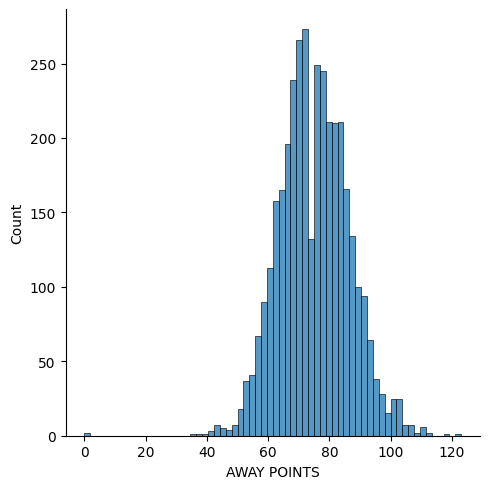

In [7]:
import seaborn as sns

sns.displot(train, x = 'AWAY POINTS')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


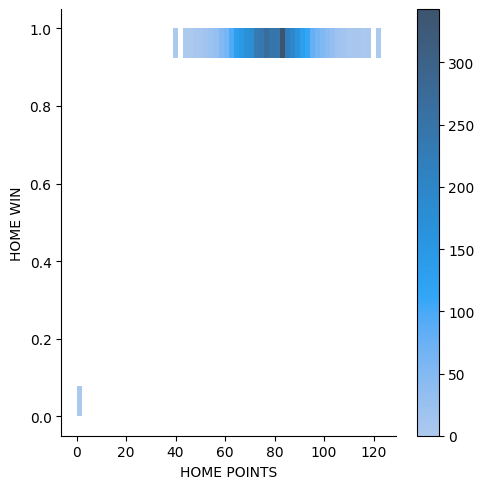

In [8]:
sns.displot(train,x='HOME POINTS', y = 'HOME WIN', cbar= True)

<Axes: xlabel='AWAY POINTS', ylabel='A MADE 3 POINTS'>

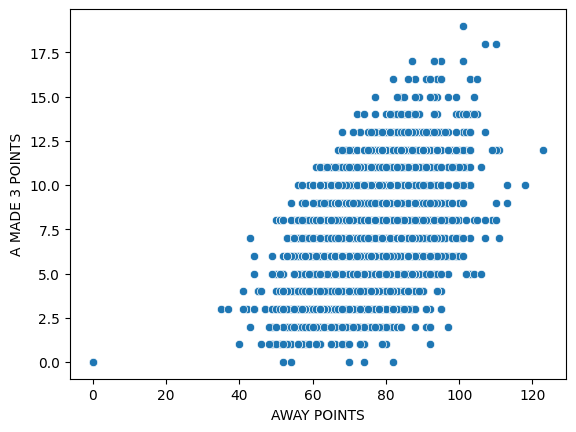

In [9]:
sns.scatterplot(x='AWAY POINTS', y = 'A MADE 3 POINTS', data=train)

<Axes: xlabel='H STEALS', ylabel='H FOULS COMMITED'>

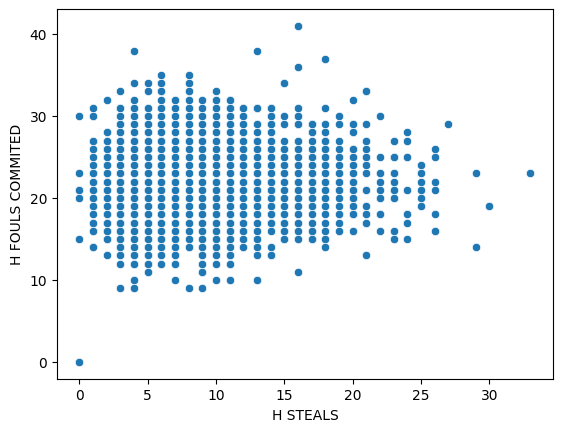

In [10]:
sns.scatterplot(x = 'H STEALS', y = 'H FOULS COMMITED', data = train)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


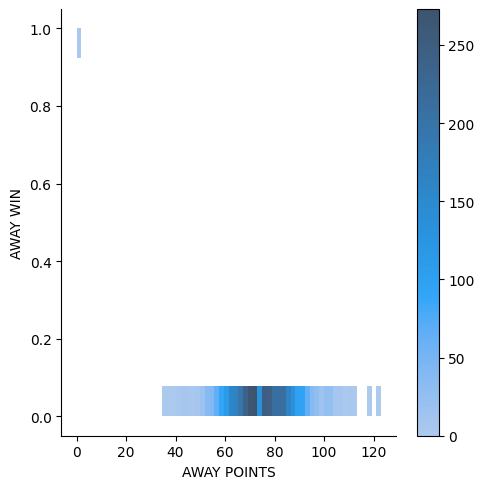

In [11]:
sns.displot(train,x='AWAY POINTS', y = 'AWAY WIN', cbar= True)

In [12]:
for i in range (0,len(train)):
    h_total_points = train.at[i,'H MADE 1 POINTS'] + 2*train.at[i,'H MADE 2 POINTS'] + 3*train.at[i,'H MADE 3 POINTS']
    if train.at[i,'HOME POINTS'] is not h_total_points:
        train.at[i,'HOME POINTS'] = h_total_points
    hq_points = train.at[i,'H Q1'] + train.at[i,'H Q2'] + train.at[i,'H Q3'] + train.at[i,'H Q4'] + train.at[i,'H OVERTIME 1'] + train.at[i,'H OVERTIME 2']
    if h_total_points is not hq_points:
        train.at[i,'H Q4'] = h_total_points - (train.at[i,'H Q1'] + train.at[i,'H Q2'] + train.at[i,'H Q3'] + train.at[i,'H OVERTIME 1'] + train.at[i,'H OVERTIME 2'])
    a_total_points = train.at[i,'A MADE 1 POINTS'] + 2*train.at[i,'A MADE 2 POINTS'] + 3*train.at[i,'A MADE 3 POINTS']
    if train.at[i,'AWAY POINTS'] is not a_total_points:
        train.at[i,'AWAY POINTS'] = a_total_points
    aq_points = train.at[i,'A Q1'] + train.at[i,'A Q2'] + train.at[i,'A Q3'] + train.at[i,'A Q4'] + train.at[i,'A OVERTIME 1'] + train.at[i,'A OVERTIME 2']
    if a_total_points is not aq_points:
        train.at[i,'A Q4'] = a_total_points - (train.at[i,'A Q1'] + train.at[i,'A Q2'] + train.at[i,'A Q3'] + train.at[i,'A OVERTIME 1'] + train.at[i,'A OVERTIME 2'])
    if h_total_points > a_total_points:
        train.at[i,'HOME WIN'] = 1
        train.at[i,'AWAY WIN'] = 0
    elif h_total_points < a_total_points:
        train.at[i,'HOME WIN'] = 0
        train.at[i,'AWAY WIN'] = 1
    else:
        train.at[i,'HOME WIN'] = 0
        train.at[i,'AWAY WIN'] = 0

for i in range (0,len(test)):
    h_total_points = test.at[i,'H MADE 1 POINTS'] + 2*test.at[i,'H MADE 2 POINTS'] + 3*test.at[i,'H MADE 3 POINTS']
    if test.at[i,'HOME POINTS'] is not h_total_points:
        test.at[i,'HOME POINTS'] = h_total_points
    hq_points = test.at[i,'H Q1'] + test.at[i,'H Q2'] + test.at[i,'H Q3'] + test.at[i,'H Q4'] + test.at[i,'H OVERTIME 1'] + test.at[i,'H OVERTIME 2']
    if h_total_points is not hq_points:
        test.at[i,'H Q4'] = h_total_points - (test.at[i,'H Q1'] + test.at[i,'H Q2'] + test.at[i,'H Q3'] + test.at[i,'H OVERTIME 1'] +  test.at[i,'H OVERTIME 2'])
    a_total_points = test.at[i,'A MADE 1 POINTS'] + 2*test.at[i,'A MADE 2 POINTS'] + 3*test.at[i,'A MADE 3 POINTS']
    if test.at[i,'AWAY POINTS'] is not a_total_points:
        test.at[i,'AWAY POINTS'] = a_total_points
    aq_points = train.at[i,'A Q1'] + test.at[i,'A Q2'] + test.at[i,'A Q3'] + test.at[i,'A Q4'] + test.at[i,'A OVERTIME 1'] + test.at[i,'A OVERTIME 2']
    if a_total_points is not aq_points:
        test.at[i,'A Q4'] = a_total_points - (test.at[i,'A Q1'] + test.at[i,'A Q2'] + test.at[i,'A Q3'] + test.at[i,'A OVERTIME 1'] + test.at[i,'A OVERTIME 2'])
    if h_total_points > a_total_points:
        test.at[i,'HOME WIN'] = 1
        test.at[i,'AWAY WIN'] = 0
    elif h_total_points < a_total_points:
        test.at[i,'HOME WIN'] = 0
        test.at[i,'AWAY WIN'] = 1
    else:
        test.at[i,'HOME WIN'] = 0
        test.at[i,'AWAY WIN'] = 0
        
        
train.dropna(how='any',axis=1,inplace=True)
test.dropna(how='any',axis=1,inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


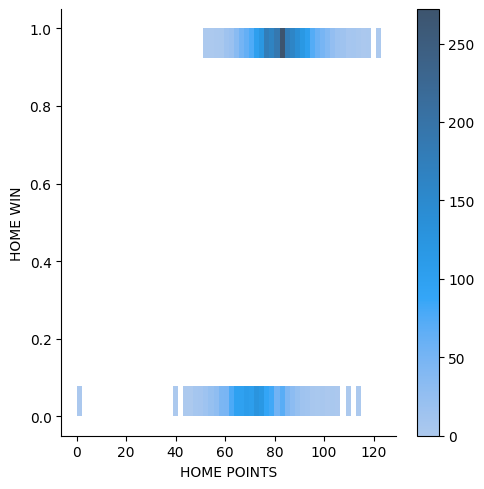

In [13]:
sns.displot(train,x='HOME POINTS', y = 'HOME WIN', cbar= True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


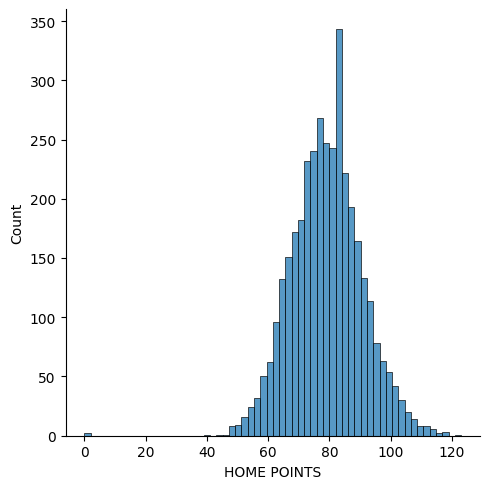

In [14]:
sns.displot(train,x='HOME POINTS')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


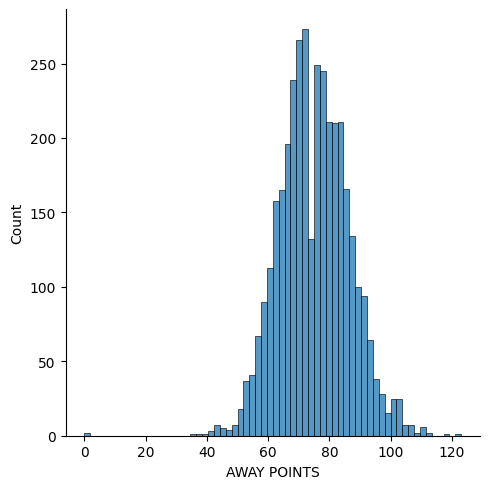

In [15]:
sns.displot(train,x='AWAY POINTS')

<Axes: xlabel='AWAY POINTS', ylabel='A MADE 3 POINTS'>

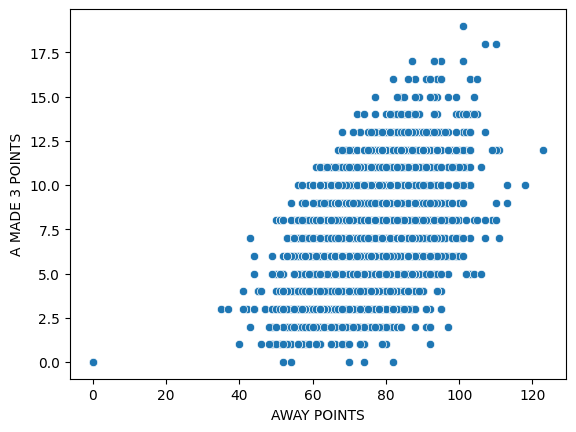

In [16]:
sns.scatterplot(x='AWAY POINTS', y = 'A MADE 3 POINTS', data=train)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


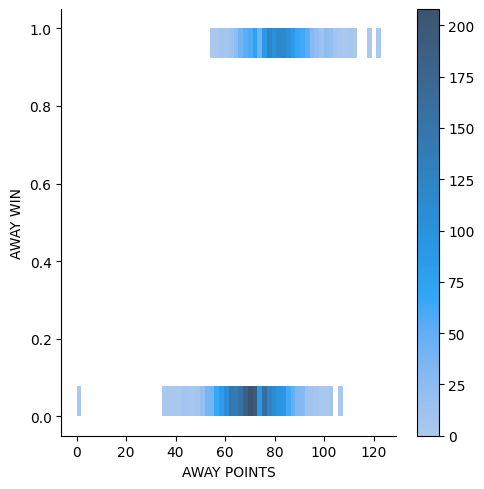

In [17]:
sns.displot(train,x='AWAY POINTS', y = 'AWAY WIN', cbar= True)

In [18]:
print(max(HQ3))
print(min(HQ3))

38
6


**Data split**

In [19]:
X_train = train.drop(['HOME WIN','AWAY WIN'], axis=1)
X_test = test.drop(['HOME WIN','AWAY WIN'], axis=1)

print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))


y_train = train["HOME WIN"]
y_test = test["HOME WIN"]
print("Shape of new dataframes - {} , {}".format(y_train.shape, y_test.shape))


Shape of new dataframes - (3667, 50) , (917, 50)
Shape of new dataframes - (3667,) , (917,)


**Model preparation**

In [20]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
        leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

**Model fit**

In [21]:
f_model = model.fit(X_train, y_train.values.ravel())
prediction = f_model.predict(X_test)
prediction_train = f_model.predict(X_train)

**F1 score**

In [22]:
print("Score f1 train set:",round(f1_score(prediction_train,y_train),4))

print("Score f1 test set:",round(f1_score(prediction,y_test),4))

Score f1 train set: 0.9618
Score f1 test set: 0.9274


**Create submission**

In [23]:
sample_submission = pd.read_csv('/kaggle/input/duth-ir-2023-2024/sample_submission.csv')
sample_submission.head()


sub_df = pd.DataFrame({"ID":sample_submission["ID"].values})
sub_df["HOME WIN"] = prediction
sub_df["HOME WIN"] = sub_df["HOME WIN"].apply(lambda x: 1 if x>1 else 0 if x<0 else x)
sub_df.to_csv("submission_benchmark.csv", index=False)